In [2]:
#!/usr/bin/env python

# I made a copy of this because I will have to update some functions if I want to output ndvi summary stats.
# Errors being thrown for 'max value' in threshold functions.
# I think this max has been set at 255 as default and is no longer an option?
# The first step will be to use the code below on the server to create the kernel here in jupyter.

# first activate the environment then change the relevant fields here and run. 
# python -m ipykernel install --user --name plantcv_4.x_21Feb23 --display-name "Python (plantcv_4.x_21Feb23)"

# Has now been successfully updated to use kernel plantcv_4.0.1_01Sep23

import sys, traceback
import cv2
import os
import re
import numpy as np
import argparse
import string
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

In [3]:
# SNAP2

# This cell is from the VIS + NIR Tutorial, the new way to specify options?
#Import a sample image and define it to be used in the notebook
args = WorkflowInputs(
    images=["/home/cluebbert/plantcv-ts/IB019/large_cc_pics/VIS_SV_0_z1_h1_g370_e1500_v500_2_0.png",
            "/home/cluebbert/plantcv-ts/IB019/large_cc_pics/NIR_SV_0_z1_h1_g0_e21500_v500_8_0.png"],
    names="vis,nir",
    result="single_image_test/IB016_single_image_out_colorcorrect.csv",
    outdir="single_image_test/out_colorcorrect",
    writeimg=True,
    debug="plot"
)

In [4]:
# This cell is from the VIS + NIR Tutorial, the new way to specify options?
# Set debug to the global parameter 
pcv.params.debug = args.debug

# Change the display settings
pcv.params.dpi = 100
pcv.params.text_size = 20
pcv.params.text_thickness = 20
pcv.params.debug_outdir = args.outdir

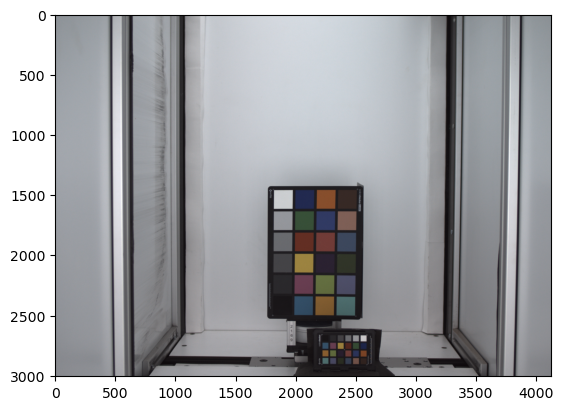

In [5]:
# Read image
img, path, filename = pcv.readimage(args.vis)

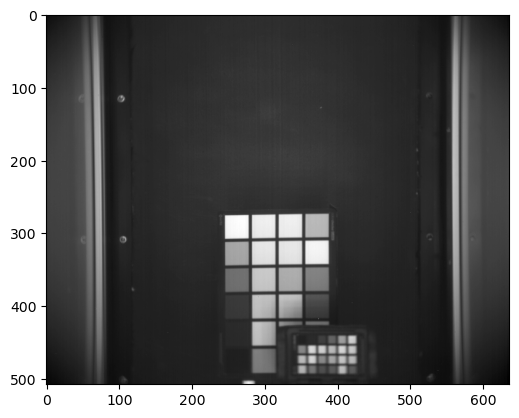

In [6]:
# Read in NIR image

nir, path1, filename_nir = pcv.readimage(filename=args.nir, mode='gray')

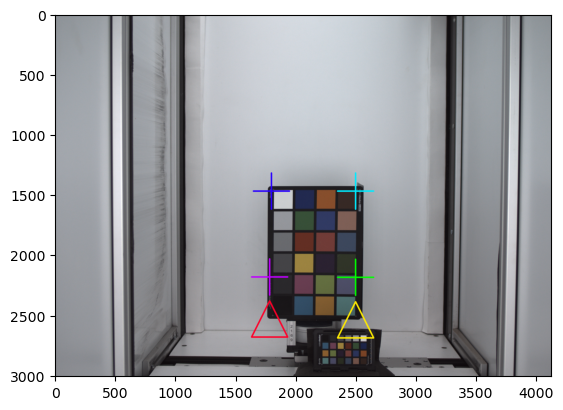

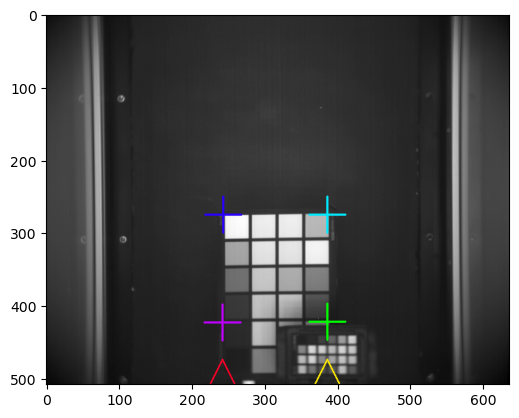

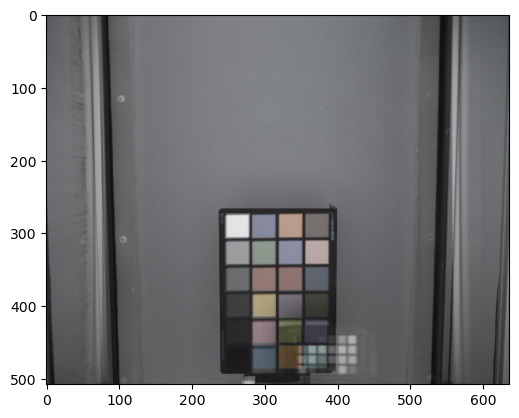

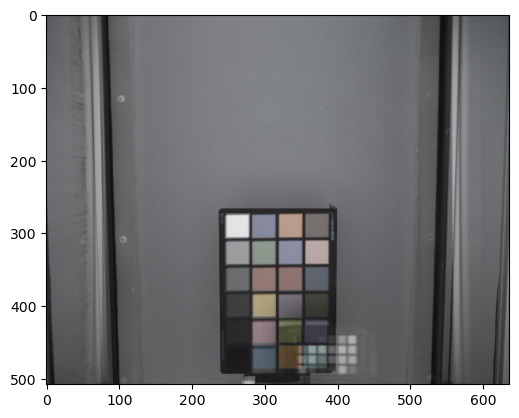

array([[[85, 83, 82],
        [92, 90, 87],
        [89, 89, 87],
        ...,
        [85, 82, 79],
        [82, 82, 79],
        [74, 70, 70]],

       [[88, 86, 85],
        [88, 88, 89],
        [93, 88, 86],
        ...,
        [86, 82, 80],
        [82, 81, 78],
        [73, 69, 71]],

       [[89, 87, 84],
        [94, 89, 87],
        [90, 90, 88],
        ...,
        [84, 83, 79],
        [84, 81, 77],
        [73, 69, 66]],

       ...,

       [[55, 52, 52],
        [67, 70, 69],
        [64, 65, 67],
        ...,
        [91, 90, 91],
        [91, 90, 92],
        [92, 90, 92]],

       [[54, 52, 54],
        [68, 69, 67],
        [63, 65, 65],
        ...,
        [91, 89, 92],
        [91, 91, 92],
        [92, 90, 88]],

       [[54, 51, 52],
        [66, 66, 67],
        [66, 65, 65],
        ...,
        [93, 90, 91],
        [91, 88, 90],
        [90, 89, 89]]], dtype=uint8)

In [29]:
# my values, from color card images

# plotting params
pcv.params.marker_size = 50
pcv.params.line_thickness = 2

# blue, cyan, green, yellow, red, purple

mask_warped, mat = pcv.transform.warp(img=img, refimg=nir,
                                      pts=[(1800, 1470), (2500, 1470), (2500, 2186), (2500, 2539), (1785, 2532), (1785, 2183)],
                                      refpts=[(243,275), (386,275), (386, 422), (386, 499), (242, 499), (242, 423)],
                                      method='lmeds')

# viz_lft_x = 1765
# viz_rt_x = 2500
# viz_top_y = 1485
# viz_mid_y = 2325
# viz_bot_y = 2532

# mask_warped, mat = pcv.transform.warp(img=img, refimg=nir,
#                                       pts=[(viz_lft_x, viz_top_y), (viz_lft_x, viz_mid_y), (viz_lft_x, viz_bot_y), (viz_lft_x, viz_bot_y), (viz_lft_x, viz_mid_y), (viz_lft_x, viz_top_y)],
#                                       refpts=[(243,275), (386,275), (386, 422), (386, 499), (242, 499), (242, 423)],
#                                       method='lmeds')

# use these values to warp all other images

# check with image
pcv.visualize.overlay_two_imgs(mask_warped, nir, alpha=0.5)